In [102]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [103]:
from PIL import Image
import os
import numpy as np
from sklearn.decomposition import IncrementalPCA
import pandas as pd
import pylab as pl
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [104]:
def load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

def plot_image_space(images, X, title="Projection of the Images into 2 Dimensions"):
    """Generates and shows a plot of images in a feature space.

    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    # Create a figure
    pl.figure(figsize=(16, 5))
    ax = pl.subplot(111)
    #ax.axis('off')

    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])

    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)


In [140]:
img_dir = os.path.join(os.getcwd(), "/Users/ruchitha/Desktop/DataMining_Projects/DataMining_Assignment-3/images") # directory path
images = load_images(img_dir) # load images in the specified directory

In [141]:
X = pd.DataFrame([im.histogram() for im in images])
X.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,255,38,40,37,49,35,54,55,79,68,...,18,7,7,4,7,10,4,6,3,58
1,3,0,3,4,3,3,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,4,5,8,19,16,11,...,13,9,12,9,15,17,12,24,11,46
4,0,0,0,0,0,0,0,2,0,3,...,8,5,13,10,7,11,18,16,15,50


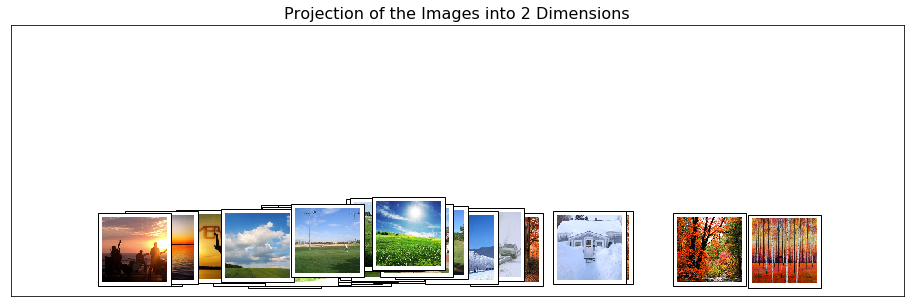

In [142]:
plot_image_space(images, X)

In [154]:
pca.fit(x)
zscore_x = stats.zscore(X)
pca.fit(zscore_x)
pca = PCA(n_components=2)
pca.transform(zscore_x)




NameError: name 'x' is not defined

In [155]:
y

array([[-12.21775234,   0.67814699],
       [ -5.09442562,  -4.95452142],
       [ -6.72304148,  -7.82800936],
       [-10.86651881,   2.70964679],
       [ -6.80419307,  -3.80870064],
       [ -6.02090644,  -7.34632041],
       [ -0.66109494,  -4.34614337],
       [-15.52089284,   0.41053201],
       [ -5.99929401,  -9.09995243],
       [-11.71087126,  -6.06101241],
       [ 20.46831475, -22.25374245],
       [ 20.27057941,  -2.44715237],
       [ 21.75567583, -14.82132805],
       [ 19.62413411, -11.88043085],
       [ 12.21072829,  -4.3790293 ],
       [ 20.2634831 ,  18.94301203],
       [ 11.56341066,   9.67237693],
       [ 13.08437261,  34.80225043],
       [ 13.98653924,  10.82005365],
       [ 12.43937623,  -8.56091881],
       [ -5.86205059,  -3.46683473],
       [ -7.42918051,  -1.44626858],
       [ -3.19693346,  -2.87471761],
       [ -5.53726583,   1.22062   ],
       [ -6.94662694,  -2.28701792],
       [-20.63845161,   0.76401474],
       [-15.32056246,   1.09267821],
 

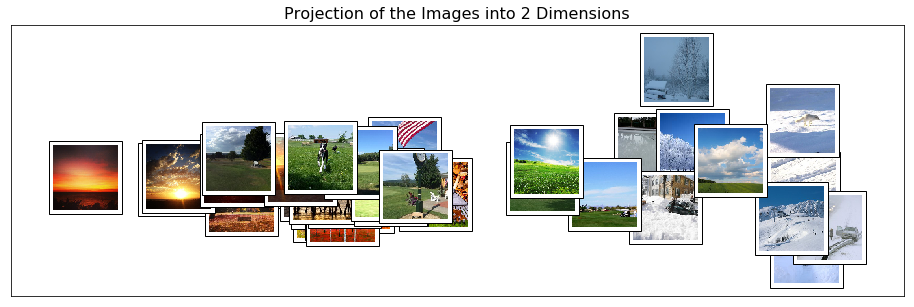

In [157]:
plot_image_space(images, y)

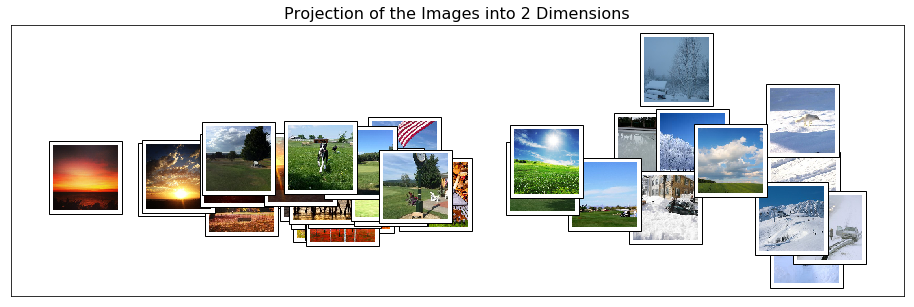

In [158]:
pca_full = PCA(n_components=2, svd_solver='full')
pca_full.fit(zscore_x)
full_y = pca_full.fit_transform(zscore_x)
plot_image_space(images, full_y)

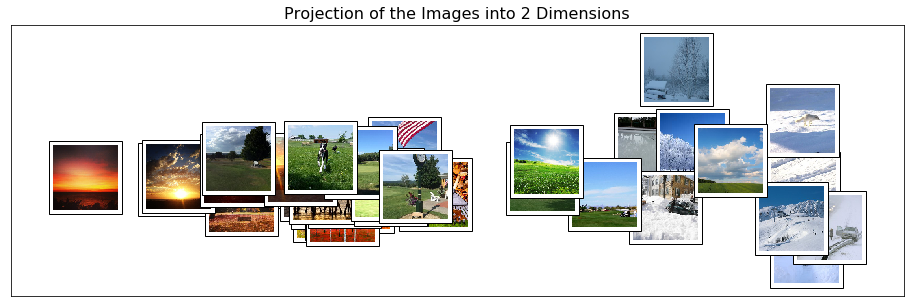

In [159]:
pca_arpack = PCA(n_components=2, svd_solver='arpack')
pca_arpack.fit(zscore_x)
arpack_y = pca_arpack.fit_transform(zscore_x)
plot_image_space(images, arpack_y)

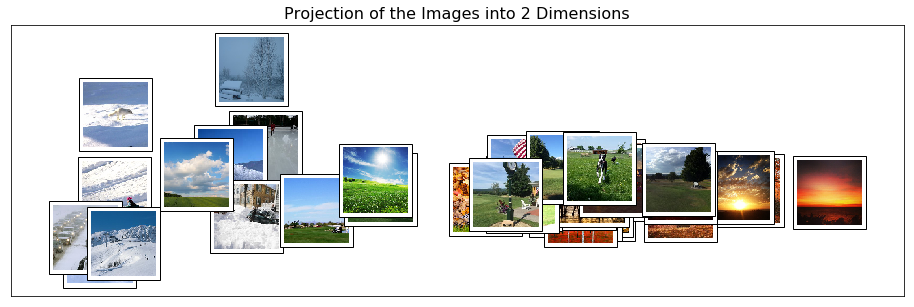

In [161]:
ipca = IncrementalPCA(n_components=2, batch_size=3)
ipca.fit(zscore_x)
IncrementalPCA(batch_size=3, copy=True, n_components=2, whiten=False)
ipca_vec = ipca.fit_transform(zscore_x)
plot_image_space(images, ipca_vec)

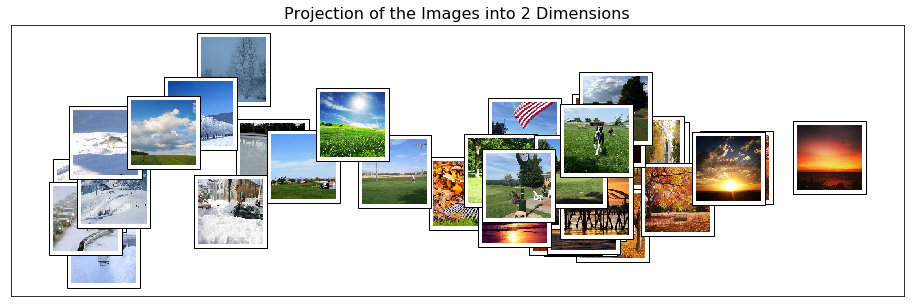

In [125]:
scaler = MinMaxScaler()
scaler.fit(X)
MinMaxScaler(copy=True, feature_range=(0, 1))
minmax_x = scaler.transform(X)
pca.fit(minmax_x)
y1 = pca.fit_transform(minmax_x)
plot_image_space(images, y1)

In [55]:
img_dir1 = os.path.join(os.getcwd(), "/Users/ruchitha/Desktop/DataMining_Projects/DataMining_Assignment-3/ani") # directory path
img_dir1


'/Users/ruchitha/Desktop/DataMining_Projects/DataMining_Assignment-3/ani'

In [56]:
images1 = load_images(img_dir1) # load images in the specified directory


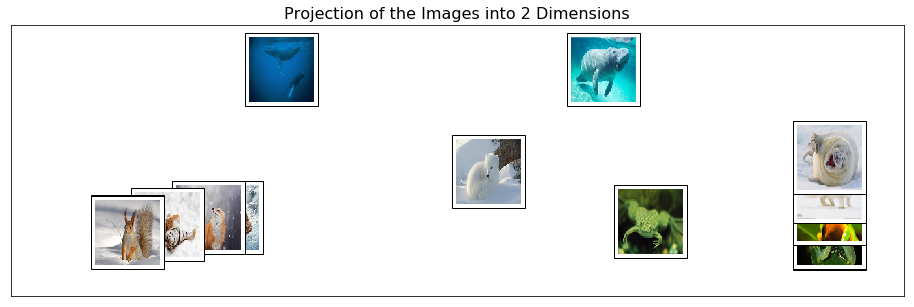

In [58]:

X1 = pd.DataFrame([im.histogram() for im in images1])
plot_image_space(images1, X1)

In [130]:
X1.head()
znorm_x1 = stats.zscore(X1)
pca.fit(znorm_x1)
y3 = pca.fit_transform(znorm_x1)

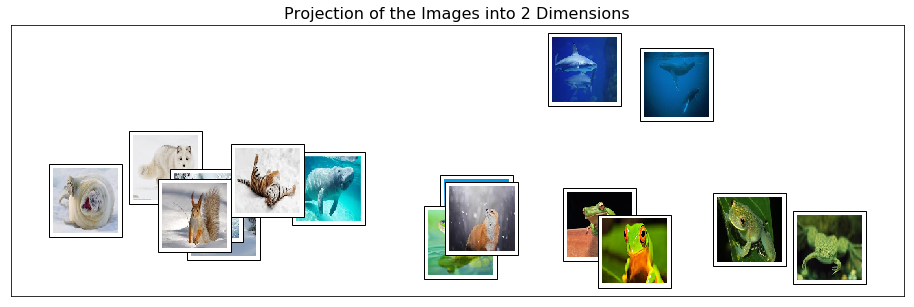

In [131]:
plot_image_space(images1, y3)

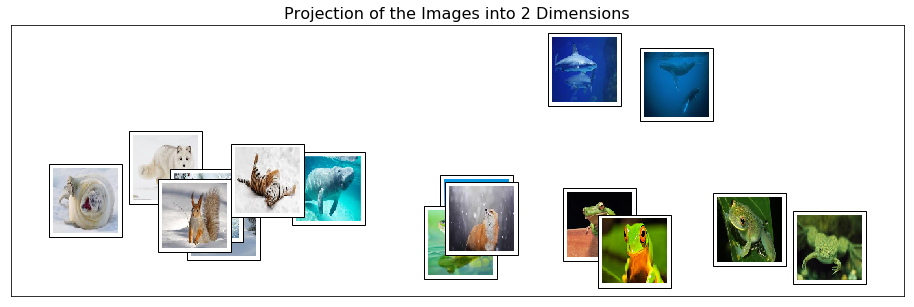

In [132]:
pca_full.fit(znorm_x1)
full_y1 = pca_full.fit_transform(znorm_x1)
plot_image_space(images1, full_y1)

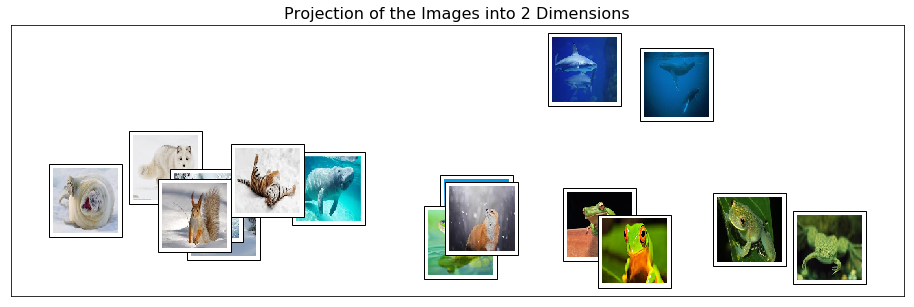

In [133]:
pca_arpack.fit(znorm_x1)
arpack_y1 = pca_arpack.fit_transform(znorm_x1)
plot_image_space(images1, arpack_y1)

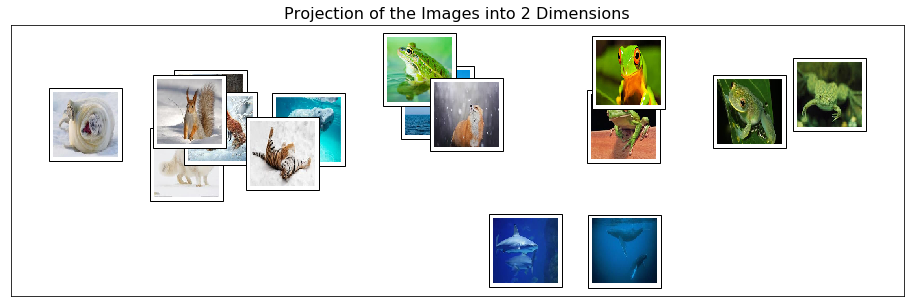

In [134]:
ipca.fit(znorm_x1)
IncrementalPCA(batch_size=3, copy=True, n_components=2, whiten=False)
ipca_y1 = ipca.transform(znorm_x1)
plot_image_space(images1, ipca_y1)

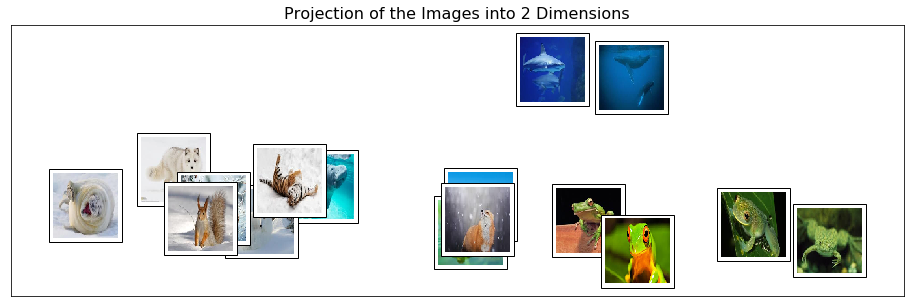

In [135]:
scaler1 = MinMaxScaler()
scaler1.fit(X1)
MinMaxScaler(copy=True, feature_range=(0, 1))
minmax_x1 = scaler1.transform(X1)
pca.fit(X1)
y2 = pca.fit_transform(minmax_x1)
plot_image_space(images1, y2)

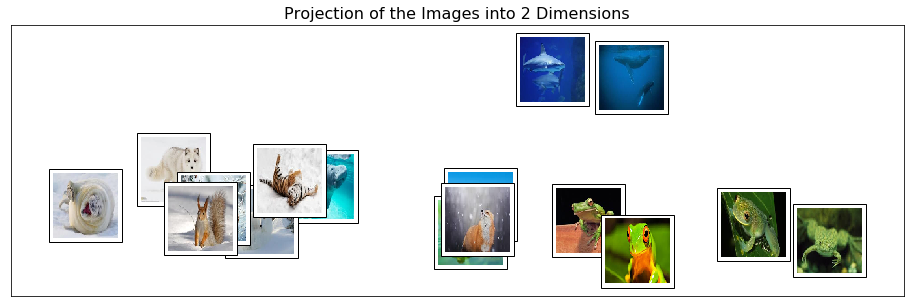

In [136]:
pca_full.fit(minmax_x1)
y2_full = pca_full.fit_transform(minmax_x1)
plot_image_space(images1, y2)

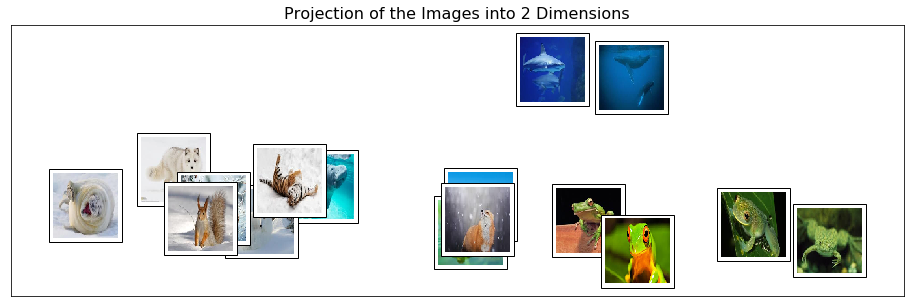

In [137]:
pca_arpack.fit(minmax_x1)
y2_arpack = pca_arpack.fit_transform(minmax_x1)
plot_image_space(images1, y2)

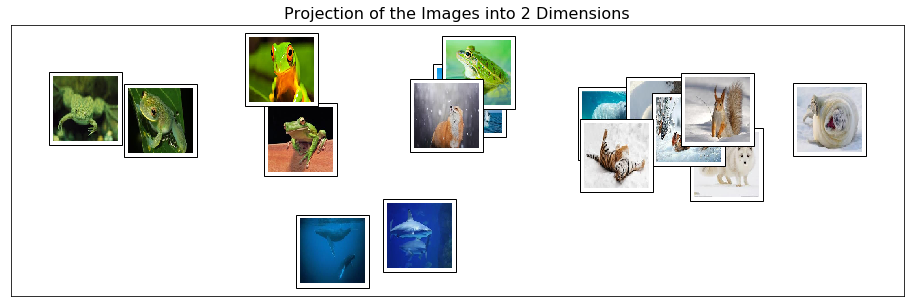

In [162]:
ipca.fit(minmax_x1)
y2_ipca = ipca.transform(minmax_x1)
plot_image_space(images1, y2_ipca)

In [ ]:
Part 2 :
In this plot, we are reducing the given data with 768 dimensions to 2 dimensions 
which can effectively differentiate data points. We can observe from the plot we 
have that images which are of similar colour appear close together and the ones 
which are of different colours are found  far apart. 

Part-3 :
On applying LAPACK solver(full SVD) and ARPACK  PCA implementation techniques, we 
can notice that there is no change in the plot. But on applying the incremental PCA, 
there is a slight change in the images plotted( But the images with similar colour 
appear together even in this case)